## Subject 7: The SARS-CoV-2 (Covid-19) epidemic

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

The data on the SARS-CoV-2 (Covid-19) epidemic are available on [Github](https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv). The file is in CSV format, each line corresponds to a day in the observation period

In [21]:
import os
import urllib.request

data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
data_file = "time_series_covid19_confirmed_global.csv"

if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

In [22]:
raw_data = pd.read_csv(data_file)
raw_data

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN              Antarctica   
6                                             NaN     Antigua and Barbuda   
7                                             NaN               Argentina   
8                                             NaN                 Armenia   
9                    Australian Capital Territory               Australia   
10                                New South Wales               Australia   
11                             Northern Territory               Australia   
12                                     Queensland               Australia   
13                                South Australia               Australia   
14                                       Tasmania               Australia   
15                                       Victoria               Australia   
16                              Western Australia               Australia   
17                                            NaN                 Austria   
18                                            NaN              Azerbaijan   
19                                            NaN                 Bahamas   
20                                            NaN                 Bahrain   
21                                            NaN              Bangladesh   
22                                            NaN                Barbados   
23                                            NaN                 Belarus   
24                                            NaN                 Belgium   
25                                            NaN                  Belize   
26                                            NaN                   Benin   
27                                            NaN                  Bhutan   
28                                            NaN                 Bolivia   
29                                            NaN  Bosnia and Herzegovina   
..                                            ...                     ...   
259                                           NaN                  Tuvalu   
260                                           NaN                      US   
261                                           NaN                  Uganda   
262                                           NaN                 Ukraine   
263                                           NaN    United Arab Emirates   
264                                      Anguilla          United Kingdom   
265                                       Bermuda          United Kingdom   
266                        British Virgin Islands          United Kingdom   
267                                Cayman Islands          United Kingdom   
268                               Channel Islands          United Kingdom   
269                   Falkland Islands (Malvinas)          United Kingdom   
270                                     Gibraltar          United Kingdom   
271                                      Guernsey          United Kingdom   
272                                   Isle of Man          United Kingdom   
273                                        Jersey          United Kingdom   
274                                    Montserrat          United Kingdom   
275                              Pitcairn Islands          United Kingdom   
276  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
277                      Turks and Caicos Islands          United Kingdom   
278                                           NaN          United Kingdom   
279                            

Show Country/Region available in dataset

In [23]:
raw_data['Country/Region']

0                 Afghanistan
1                     Albania
2                     Algeria
3                     Andorra
4                      Angola
5                  Antarctica
6         Antigua and Barbuda
7                   Argentina
8                     Armenia
9                   Australia
10                  Australia
11                  Australia
12                  Australia
13                  Australia
14                  Australia
15                  Australia
16                  Australia
17                    Austria
18                 Azerbaijan
19                    Bahamas
20                    Bahrain
21                 Bangladesh
22                   Barbados
23                    Belarus
24                    Belgium
25                     Belize
26                      Benin
27                     Bhutan
28                    Bolivia
29     Bosnia and Herzegovina
                ...          
259                    Tuvalu
260                        US
261       

## Take value of _**Belgium**_ :

In [24]:
belgium_raw = raw_data[raw_data['Country/Region'].str.contains('Belgium')]
print(belgium_raw)

   Province/State Country/Region      Lat      Long  1/22/20  1/23/20  \
24            NaN        Belgium  50.8333  4.469936        0        0   

    1/24/20  1/25/20  1/26/20  1/27/20   ...     2/28/23   3/1/23   3/2/23  \
24        0        0        0        0   ...     4717655  4717655  4727795   

     3/3/23   3/4/23   3/5/23   3/6/23   3/7/23   3/8/23   3/9/23  
24  4727795  4727795  4727795  4727795  4727795  4727795  4739365  

[1 rows x 1147 columns]


Only take cumulative cases data with date

In [25]:
belgium_cases = belgium_raw.iloc[:, 4:]
belgium_cases

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
24        0        0        0        0        0        0        0        0   

    1/30/20  1/31/20   ...     2/28/23   3/1/23   3/2/23   3/3/23   3/4/23  \
24        0        0   ...     4717655  4717655  4727795  4727795  4727795   

     3/5/23   3/6/23   3/7/23   3/8/23   3/9/23  
24  4727795  4727795  4727795  4727795  4739365  

[1 rows x 1143 columns]

PLot cumulative number of cases each day:

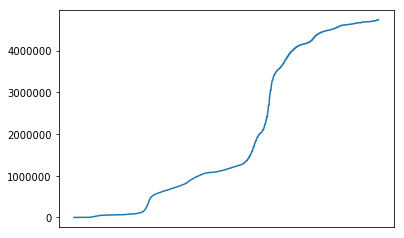

In [26]:
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.plot(belgium_cases.T)

## Take value of _**China**_ :

In [27]:
china_raw = raw_data[raw_data['Country/Region'].str.contains('China')]
print(china_raw)

    Province/State Country/Region      Lat      Long  1/22/20  1/23/20  \
59           Anhui          China  31.8257  117.2264        1        9   
60         Beijing          China  40.1824  116.4142       14       22   
61       Chongqing          China  30.0572  107.8740        6        9   
62          Fujian          China  26.0789  117.9874        1        5   
63           Gansu          China  35.7518  104.2861        0        2   
64       Guangdong          China  23.3417  113.4244       26       32   
65         Guangxi          China  23.8298  108.7881        2        5   
66         Guizhou          China  26.8154  106.8748        1        3   
67          Hainan          China  19.1959  109.7453        4        5   
68           Hebei          China  39.5490  116.1306        1        1   
69    Heilongjiang          China  47.8620  127.7615        0        2   
70           Henan          China  37.8957  114.9042        5        5   
71       Hong Kong          China  22.

Calculate total cumulative cases in all china:

In [28]:
china_cases = china_raw.iloc[:, 4:].sum(axis=0).to_frame().T
china_cases

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0      548      643      920     1406     2075     2877     5509     6087   

   1/30/20  1/31/20   ...     2/28/23   3/1/23   3/2/23   3/3/23   3/4/23  \
0     8141     9802   ...     4903524  4903524  4903524  4903524  4903524   

    3/5/23   3/6/23   3/7/23   3/8/23   3/9/23  
0  4903524  4903524  4903524  4903524  4903524  

[1 rows x 1143 columns]

PLot cumulative number of cases each day:

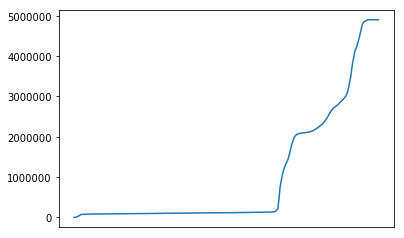

In [29]:
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.plot(china_cases.T)

## Take value of _**France**_ :

In [30]:
france_raw = raw_data[raw_data['Country/Region'].str.contains('France')]
# print(france_raw)
france_cases = france_raw.iloc[:, 4:].sum(axis=0).to_frame().T
# france_cases

## Take value of _**Germany**_ :

In [31]:
germany_raw = raw_data[raw_data['Country/Region'].str.contains('Germany')]
# print(germany_raw)
germany_cases = germany_raw.iloc[:, 4:]
# germany_cases

## Take value of _**Italy**_ :

In [32]:
italy_raw = raw_data[raw_data['Country/Region'].str.contains('Italy')]
italy_cases = italy_raw.iloc[:, 4:]
# italy_cases

## Take value of _**Japan**_ :

In [33]:
japan_raw = raw_data[raw_data['Country/Region'].str.contains('Japan')]
japan_cases = japan_raw.iloc[:, 4:]
# japan_cases

## Take value of _**Netherlands**_ :

In [34]:
netherlands_raw = raw_data[raw_data['Country/Region'].str.contains('Netherlands')]
netherlands_cases = netherlands_raw.iloc[:, 4:].sum(axis=0).to_frame().T
# netherlands_cases

## Take value of _**Spain**_ :

In [35]:
spain_raw = raw_data[raw_data['Country/Region'].str.contains('Spain')]
spain_cases = spain_raw.iloc[:, 4:]
# spain_cases

## Take value of _**United Kingdom**_ :

In [36]:
UK_raw = raw_data[raw_data['Country/Region'].str.contains('United Kingdom')]
UK_cases = UK_raw.iloc[:, 4:].sum(axis=0).to_frame().T
# UK_cases

# Visualization of different countries the cumulative number of people with SARS-CoV-2 disease since the beginning of the pandemic

Plot graph with a linear scale

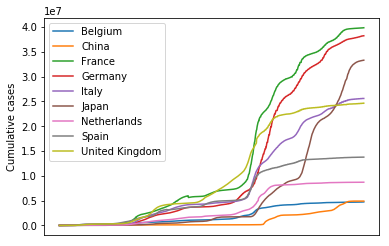

In [49]:
x = range(len(belgium_cases.T))
ax = plt.gca()
ax.get_xaxis().set_visible(False)

plt.plot(x, belgium_cases.T, label='Belgium')
plt.plot(x, china_cases.T, label='China')
plt.plot(x, france_cases.T, label='France')
plt.plot(x, germany_cases.T, label='Germany')
plt.plot(x, italy_cases.T, label='Italy')
plt.plot(x, japan_cases.T, label='Japan')
plt.plot(x, netherlands_cases.T, label='Netherlands')
plt.plot(x, spain_cases.T, label='Spain')
plt.plot(x, UK_cases.T, label='United Kingdom')

# Add labels and legend
plt.ylabel('Cumulative cases')
plt.legend()

Plot graph with a logarithmic scale

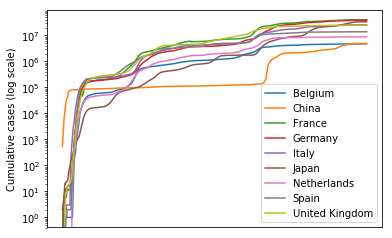

In [53]:
ax = plt.gca()
ax.get_xaxis().set_visible(False)

plt.plot(x, belgium_cases.T, label='Belgium')
plt.plot(x, china_cases.T, label='China')
plt.plot(x, france_cases.T, label='France')
plt.plot(x, germany_cases.T, label='Germany')
plt.plot(x, italy_cases.T, label='Italy')
plt.plot(x, japan_cases.T, label='Japan')
plt.plot(x, netherlands_cases.T, label='Netherlands')
plt.plot(x, spain_cases.T, label='Spain')
plt.plot(x, UK_cases.T, label='United Kingdom')

plt.yscale('log')
# Add labels and legend
plt.ylabel('Cumulative cases (log scale)')
plt.legend()